# REDSHIFT DISTRIBUTION OF GALAXIES

This test checks different filters against the DES's redshift distribution of galaxies.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sc
from astropy.cosmology import FlatLambdaCDM

In [2]:
import sys

## Load cosmosis quantities

* Metadata

In [3]:
nbin = 4
bin_a, bin_b = np.tril_indices(nbin)
bin_a += 1
bin_b += 1

In [53]:
bin_b

array([1, 1, 2, 1, 2, 3, 1, 2, 3, 4])

In [4]:
nbinl = 5
binl_a, binl_b = np.tril_indices(nbinl)
binl_a += 1
binl_b += 1

In [51]:
binl_b

array([1, 1, 2, 1, 2, 3, 1, 2, 3, 4, 1, 2, 3, 4, 5])

* Cosmology

In [5]:
cosmo = {}
with open('des-y1-test/cosmological_parameters/values.txt') as cosmo_values:
    for line in cosmo_values:
        if line:
            key, val = line.partition('=')[::2]
            cosmo[key.strip()] = float(val)

In [6]:
cosmo_astropy = FlatLambdaCDM(H0=cosmo['hubble'], Ob0=cosmo['omega_b'], Om0= cosmo['omega_m'], Tcmb0=2.7)

* Distance functions

In [7]:
zdM = np.loadtxt('des-y1-test/distances/z.txt')
dM = np.loadtxt('des-y1-test/distances/d_m.txt')

* Redshift distributions

In [10]:
zn = np.loadtxt('des-y1-test/nz_source/z.txt')
nz = [np.loadtxt('des-y1-test/nz_source/bin_%d.txt' % i) for i in range(1, nbin+1)]

In [12]:
xf = np.interp(zn, zdM, dM)

In [13]:
nlz = [np.loadtxt('des-y1-test/nz_lens/bin_%d.txt' % i) for i in range(1, nbinl+1)]

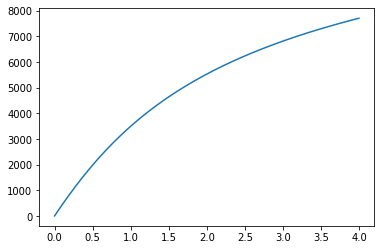

In [14]:
plt.plot(zn, xf)

## Parametric lensing efficiency

In [114]:
# mu = np.array([0.929, 1.278, 1.860, 2.473]) * 1000 / 0.7
# eta = np.array([1.235, 0.832, 0.551, 0.412]) * 0.7 / 1000

# alpha = 1.0 / (mu * eta - 1.0)
# beta = eta / (mu * eta -1.0)

# THREE_2C2 = 1.669e-11
# INVERSE_C = 3.333e-6

## Redshift distribution of galaxies

In [116]:
sys.path.append("../lensing")
from lens_filter import redshift_distribution_galaxies

In [117]:
# nTH = [redshift_distribution_galaxies(xf2,bin) for bin in range(0, nbin)]

In [118]:
# for nn in nTH:
#     plt.plot(xf2, nn)
# plt.show()

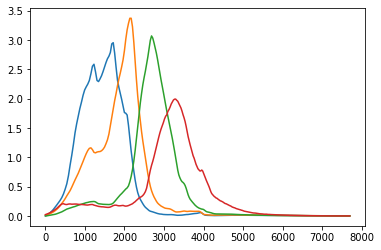

In [119]:
for nn in nz:
    plt.plot(xf, nn)
plt.show()

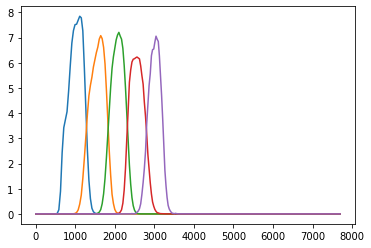

In [15]:
for nn in nlz:
    plt.plot(xf, nn)
plt.show()

## Cosmic shear

In [16]:
sys.path.append("../lensing")
from lens_filter import lensing_efficiency, parametric_lensing_efficiency

In [17]:
TINY = np.finfo(0.).tiny

In [18]:
q = [lensing_efficiency(xf, zn, n) for n in nz]
# qTH = [lensing_efficiency(xf, zn, n) for n in nTH]

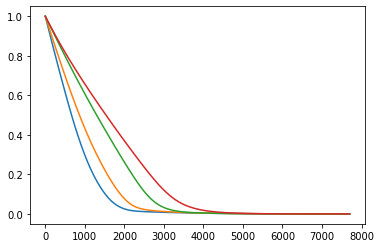

In [19]:
for qq in q:
    plt.plot(xf, qq)
plt.show()

### Convergence

In [20]:
sys.path.append("../lensing")
from lens_filter import filter_convergence

In [21]:
ff = 1.669e-11*cosmo['hubble']**2*cosmo['omega_m']*np.add(1, zn)*xf*q
fc = [filter_convergence(xf, zn, qq, cosmo_astropy) for qq in q]

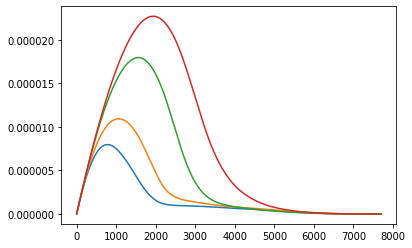

In [22]:
for qq in fc:
    plt.plot(xf, qq)
plt.show()

### Shear

In [23]:
sys.path.append("../lensing")
from lens_filter import filter_shear

In [24]:
ffs = 1.669e-11*cosmo['hubble']**2*cosmo['omega_m']*np.add(1, zn)*q/xf
fs = [filter_shear(xf, zn, qq, cosmo_astropy) for qq in q]

/Users/c49734lf/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
../lensing/lens_filter.py:217: RuntimeWarning: divide by zero encountered in true_divide
  return factor.value * (1.0 + zx) * lens_efficiency / x


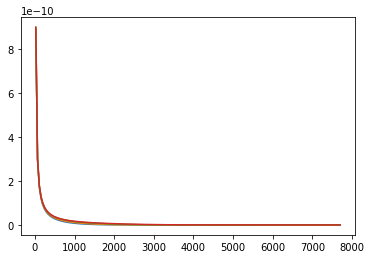

In [25]:
for f in fs:
    plt.plot(xf, f)
plt.show()

## Galaxy

In [26]:
sys.path.append("../lensing")
from lens_filter import filter_galaxy_clustering

In [27]:
# ffg = 1.669e-11*cosmo['hubble']**2*cosmo['omega_m']*np.add(1, zn)*q/xf
fg = [filter_galaxy_clustering(xf, zn, n, 1.0, cosmo_astropy) for n in nlz]

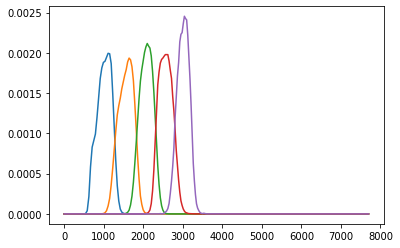

In [28]:
for f in fg:
    plt.plot(xf, f)
plt.show()

#### Galaxy-galaxy lensing

In [78]:
bin_A = np.array([1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4])
binl_B = np.array([1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5])

In [74]:
fcg = [fc[a-1] * fg[b-1] for a, b in zip(bin_A, binl_B)]

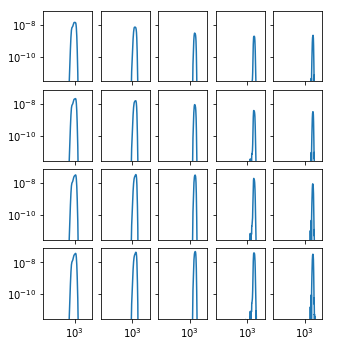

In [76]:
fig, axes = plt.subplots(4, 5, figsize=(5, 5), sharex=True, sharey=True)

for ax in axes.ravel():
    ax.axis('off')

for i, (a, b) in enumerate(zip(bin_A, binl_B)):
    ax = axes[a-1, b-1]
    ax.axis('on')
    ax.loglog(xf, fcg[i])
#     ax.set_xlim(5e-1, 2e3)
#     ax.set_ylim(2e-10, 2e-4)
#     ax.set_xticks([1e0, 1e1, 1e2, 1e3])

ax = fig.add_subplot(111, frameon=False)
ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.tick_params(axis='y', pad=12)

fig.tight_layout(pad=0.5)


plt.show()

#### Galaxy clustering

In [31]:
fgg = [fg[a-1] * fg[b-1] for a, b in zip(binl_a, binl_b)]

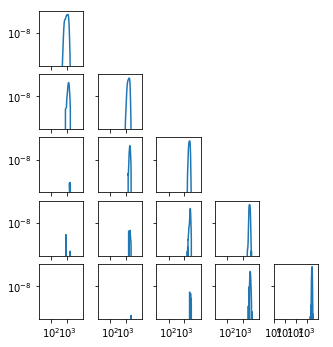

In [77]:
fig, axes = plt.subplots(5, 5, figsize=(5,5), sharex=True, sharey=True)

for ax in axes.ravel():
    ax.axis('off')

for i, (a, b) in enumerate(zip(binl_a, binl_b)):
    ax = axes[a-1, b-1]
    ax.axis('on')
    ax.loglog(xf, fgg[i])
#     ax.set_xlim(5e-1, 2e3)
#     ax.set_ylim(2e-10, 2e-4)
    ax.set_xticks([1e0, 1e1, 1e2, 1e3])

ax = fig.add_subplot(111, frameon=False)
ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.tick_params(axis='y', pad=12)

fig.tight_layout(pad=0.5)


plt.show()

### CMB FILTERS

In [133]:
import camb

In [157]:
cosmo = FlatLambdaCDM(H0=67.5, Ob0=0.0483, Om0= 0.3174653243323745)

In [134]:
sys.path.append("../lensing")
from lens_filter import lensing_efficiency_cmb

In [135]:
nz = 100

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(ns=0.965)

results = camb.get_background(pars)
xs = results.conformal_time(0) - results.tau_maxvis

In [136]:
# filter
xf = np.linspace(0., xs, 400)
zf = results.redshift_at_comoving_radial_distance(xf)

In [141]:
qf = 1 - xf/xs
qcmb = lensing_efficiency_cmb(xf, xs)

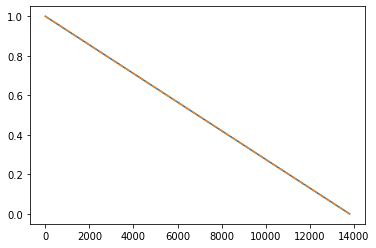

In [142]:
plt.plot(xf, qf)
plt.plot(xf, qcmb, '--')
plt.show()

In [158]:
f = 1.669e-11*pars.H0**2*pars.omegam*np.add(1, zf)*xf*qf
fc = filter_convergence(xf, zf, qcmb, cosmo)

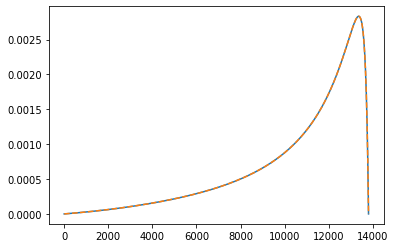

In [162]:
plt.plot(xf, f)
plt.plot(xf, fc, '--')
plt.show()